<a href="https://colab.research.google.com/github/koalalovepabro/Stock-Portfolio-Optimization/blob/main/Test/Stock_Portfolio(momentum_1month)_ver1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 종목 선택 방법: 모멘텀(1개월)

# 모멘텀 전략
* 최근에 가장 많이 오른 종목 매수한 후 일정 기간을 보유한 후 파는 전략
* 20 영업일 수익률 순위 보여줌
* https://wikidocs.net/84318

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!pip install -q install finance-datareader

In [ ]:
!pip install pykrx

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from pykrx import stock
import datetime

In [ ]:
# 오늘 KOSPI&KOSDAQ 종목 전체 불러오기
today = datetime.datetime.today().strftime("%Y%m%d")
kospi = stock.get_market_fundamental_by_ticker(today, market='KOSPI').index
kosdaq = stock.get_market_fundamental_by_ticker(today, market='KOSDAQ').index
stocks = kospi.append(kosdaq)
stocks

Index(['095570', '006840', '027410', '282330', '138930', '001460', '001465',
       '001040', '079160', '00104K',
       ...
       '065510', '243070', '084110', '263920', '145020', '024060', '010240',
       '189980', '037440', '238490'],
      dtype='object', name='티커', length=2391)

## 1개월 모멘텀

In [ ]:
def momentum_1month(stocks): # 종목 list넣으면, 모멘텀 순위 있는 데이터프레임 출력
    df = pd.DataFrame()
    for s in stocks:
      df[s] = fdr.DataReader( s, '2021-01-01')['Close']
    
    # 60 영업일 수익률
    return_df = df.pct_change(20)
    return_df
    
    # 오늘 날짜
    today = datetime.datetime.today().strftime("%Y-%m-%d")
    
    # index는 종목 코드이고 모멘텀 데이터 있는 데이터 프레임으로 만들기
    s = return_df.loc[today]
    momentum_df = pd.DataFrame(s)
    momentum_df.columns = ["모멘텀"]
    
    momentum_df['순위'] = momentum_df['모멘텀'].rank(ascending=False)
    momentum_df = momentum_df.sort_values(by='순위')
    return momentum_df # 모멘텀

In [ ]:
momentum_1month_rank = momentum_1month(stocks)

In [ ]:
momentum_1month_rank.head(30)

In [ ]:
momentum_1month_rank.tail(30)

In [ ]:
momentum_1month_rank.to_csv("momentum_1month_rank.csv")

## 미리 csv 파일로 저장해 둔 모멘텀 1개월 결과 불러오기

In [ ]:
momentum_1month_rank = pd.read_csv('momentum_1month_rank.csv')
momentum_1month_rank

,Unnamed: 0,모멘텀,순위
0,002410,1.196602,1.0
1,057880,1.155603,2.0
2,003580,1.036232,3.0
3,383310,0.991368,4.0
4,104620,0.988933,5.0
...,...,...,...
2386,221610,-0.450877,2387.0
2387,000325,-0.477419,2388.0
2388,137310,NaN,NaN
2389,352910,NaN,NaN


In [ ]:
momentum_1month_rank.index = momentum_1month_rank['Unnamed: 0']
momentum_1month_rank

,Unnamed: 0,모멘텀,순위
Unnamed: 0,,,
002410,002410,1.196602,1.0
057880,057880,1.155603,2.0
003580,003580,1.036232,3.0
383310,383310,0.991368,4.0
104620,104620,0.988933,5.0
...,...,...,...
221610,221610,-0.450877,2387.0
000325,000325,-0.477419,2388.0
137310,137310,NaN,NaN


In [ ]:
momentum_1month_rank = momentum_1month_rank.drop('Unnamed: 0', axis=1)
momentum_1month_rank

,모멘텀,순위
Unnamed: 0,,
002410,1.196602,1.0
057880,1.155603,2.0
003580,1.036232,3.0
383310,0.991368,4.0
104620,0.988933,5.0
...,...,...
221610,-0.450877,2387.0
000325,-0.477419,2388.0
137310,NaN,NaN


## 급등주 종목 저장

In [ ]:
import requests

In [ ]:
assets = np.array(momentum_1month_rank.index[:30])
assets

array(['002410', '057880', '003580', '383310', '104620', '215090',
       '064550', '189330', '293490', '189860', '043360', '289220',
       '150840', '014285', '026940', '011700', '085670', '032080',
       '069410', '139670', '096690', '311690', '244920', '339950',
       '013360', '086960', '024740', '005070', '309930', '101140'],
      dtype=object)

In [ ]:
len(assets)

30

### 종목코드와 종목이름을 딕셔너리로 저장

In [ ]:
###########추가#############
kospi_temp = fdr.StockListing('KOSPI')[['Symbol', 'Name']]
kosdaq_temp = fdr.StockListing('KOSDAQ')[['Symbol', 'Name']]
code_name_dict = pd.concat([kospi_temp,kosdaq_temp])
code_name_dict = code_name_dict.set_index('Symbol').to_dict().get('Name')
code_name_dict

{'095570': 'AJ네트웍스',
 '006840': 'AK홀딩스',
 '152100': 'ARIRANG 200',
 '295820': 'ARIRANG 200동일가중',
 '253150': 'ARIRANG 200선물레버리지',
 '253160': 'ARIRANG 200선물인버스2X',
 '278420': 'ARIRANG ESG우수기업',
 '292750': 'ARIRANG KRX300',
 '309210': 'ARIRANG KRX300헬스케어',
 '333940': 'ARIRANG KS로우볼가중TR',
 '333950': 'ARIRANG KS로우사이즈가중TR',
 '333960': 'ARIRANG KS모멘텀가중TR',
 '333970': 'ARIRANG KS밸류가중TR',
 '333980': 'ARIRANG KS퀄리티가중TR',
 '269530': 'ARIRANG S&P글로벌인프라',
 '251590': 'ARIRANG 고배당저변동50',
 '161510': 'ARIRANG 고배당주',
 '251600': 'ARIRANG 고배당주채권혼합',
 '289670': 'ARIRANG 국채선물10년',
 '298340': 'ARIRANG 국채선물3년',
 '189400': 'ARIRANG 글로벌MSCI(합성 H)',
 '278620': 'ARIRANG 단기채권액티브',
 '269540': 'ARIRANG 미국S&P500(H)',
 '287180': 'ARIRANG 미국나스닥기술주',
 '213630': 'ARIRANG 미국다우존스고배당주(합성 H)',
 '332610': 'ARIRANG 미국단기우량회사채',
 '332620': 'ARIRANG 미국장기우량회사채',
 '195970': 'ARIRANG 선진국MSCI(합성 H)',
 '238670': 'ARIRANG 스마트베타Quality채권혼합',
 '195980': 'ARIRANG 신흥국MSCI(합성 H)',
 '373530': 'ARIRANG 신흥국MSCI인버스(합성 H)',
 '256450': 'ARIRANG 심

# 3년치 주가 데이터 가져오기

In [ ]:
# 종목별 종가 가져오기
from datetime import datetime

#시작일
start_date = '2018-07-19'

# today = datetime.today().strftime('%Y-%m-%d')
end_date = '2021-07-19'

# 각 주식의 일별 종가 데이터를 저장할 데이터 프레임을 생성
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# FinanceDataReader로 각 종목의 종가데이터 불러오기
for stock in assets:
  df[stock] = fdr.DataReader(stock, start_date, end_date)['Close']
df

,002410,057880,003580,383310,104620,215090,064550,189330,293490,189860,043360,289220,150840,014285,026940,011700,085670,032080,069410,139670,096690,311690,244920,339950,013360,086960,024740,005070,309930,101140
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,1735,1885,14400,NaN,NaN,3032,9850,30500,NaN,4575,3145,NaN,12300,7490,2560,2590,3600,1970,8725,1897,3435,NaN,NaN,NaN,1315,19750,1555,24431,NaN,3165
2018-07-20,1750,1945,12000,NaN,NaN,3052,9880,30200,NaN,4400,3520,NaN,12300,7380,2540,2520,3520,1900,8691,1889,3097,NaN,NaN,NaN,1275,19800,1550,23888,NaN,2805
2018-07-23,1620,1801,9310,NaN,NaN,2909,9080,30000,NaN,4080,3395,NaN,11550,6760,2440,2250,3380,1840,8523,1865,2914,NaN,NaN,NaN,1195,18900,1440,22440,NaN,2630
2018-07-24,1665,1810,9990,NaN,NaN,3110,9110,30300,NaN,4400,3340,NaN,11600,7170,2585,2300,3510,1865,8388,1858,2914,NaN,NaN,NaN,1290,19100,1460,23164,NaN,2720
2018-07-25,1650,1638,10500,NaN,NaN,3039,8990,30300,NaN,4250,3320,NaN,11500,7170,2570,2285,3470,1830,8219,1852,2914,NaN,NaN,NaN,1255,18750,1400,23164,NaN,2630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,9500,2560,16850,189500.0,10213.0,1740,33000,81800,83100.0,11450,4360,76000.0,3720,22850,7040,3060,3095,3025,16200,30200,1252,39900.0,11000.0,4445.0,4110,22200,4580,32500,3870.0,4675
2021-07-14,8900,2662,17400,202100.0,10263.0,1750,33300,85000,81200.0,10800,5660,82600.0,3385,29700,7050,3035,3250,3025,15300,28550,1252,40600.0,11150.0,4210.0,4080,21400,5300,37450,4435.0,4685
2021-07-15,8860,2602,17850,200000.0,10614.0,1710,30550,84700,81200.0,11100,6480,82600.0,3925,34500,7050,3945,3115,3000,15450,28300,1230,39800.0,11100.0,4350.0,4110,23200,5400,37400,5760.0,4910


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2018-07-19 to 2021-07-19
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   002410  740 non-null    int64  
 1   057880  740 non-null    int64  
 2   003580  740 non-null    int64  
 3   383310  37 non-null     float64
 4   104620  610 non-null    float64
 5   215090  740 non-null    int64  
 6   064550  740 non-null    int64  
 7   189330  740 non-null    int64  
 8   293490  211 non-null    float64
 9   189860  740 non-null    int64  
 10  043360  740 non-null    int64  
 11  289220  82 non-null     float64
 12  150840  740 non-null    int64  
 13  014285  740 non-null    int64  
 14  026940  740 non-null    int64  
 15  011700  740 non-null    int64  
 16  085670  740 non-null    int64  
 17  032080  740 non-null    int64  
 18  069410  740 non-null    int64  
 19  139670  740 non-null    int64  
 20  096690  740 non-null    int64  
 21  311690  387 non-null

In [ ]:
df.isnull().sum()

002410      0
057880      0
003580      0
383310    703
104620    130
215090      0
064550      0
189330      0
293490    529
189860      0
043360      0
289220    658
150840      0
014285      0
026940      0
011700      0
085670      0
032080      0
069410      0
139670      0
096690      0
311690    353
244920    576
339950    352
013360      0
086960      0
024740      0
005070      0
309930    104
101140      0
dtype: int64

In [ ]:
# 결측값 있는 열 삭제 
df2 = df.dropna(axis = 1)
df2

,002410,057880,003580,215090,064550,189330,189860,043360,150840,014285,026940,011700,085670,032080,069410,139670,096690,013360,086960,024740,005070,101140
Date,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,1735,1885,14400,3032,9850,30500,4575,3145,12300,7490,2560,2590,3600,1970,8725,1897,3435,1315,19750,1555,24431,3165
2018-07-20,1750,1945,12000,3052,9880,30200,4400,3520,12300,7380,2540,2520,3520,1900,8691,1889,3097,1275,19800,1550,23888,2805
2018-07-23,1620,1801,9310,2909,9080,30000,4080,3395,11550,6760,2440,2250,3380,1840,8523,1865,2914,1195,18900,1440,22440,2630
2018-07-24,1665,1810,9990,3110,9110,30300,4400,3340,11600,7170,2585,2300,3510,1865,8388,1858,2914,1290,19100,1460,23164,2720
2018-07-25,1650,1638,10500,3039,8990,30300,4250,3320,11500,7170,2570,2285,3470,1830,8219,1852,2914,1255,18750,1400,23164,2630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,9500,2560,16850,1740,33000,81800,11450,4360,3720,22850,7040,3060,3095,3025,16200,30200,1252,4110,22200,4580,32500,4675
2021-07-14,8900,2662,17400,1750,33300,85000,10800,5660,3385,29700,7050,3035,3250,3025,15300,28550,1252,4080,21400,5300,37450,4685
2021-07-15,8860,2602,17850,1710,30550,84700,11100,6480,3925,34500,7050,3945,3115,3000,15450,28300,1230,4110,23200,5400,37400,4910


In [ ]:
!pip install PyPortfolioOpt

In [ ]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

### 종목별 연평균 기대수익률 & 일간수익률의 공분산

In [ ]:
# Calculate the expected annualized returns
# 연 평균 수익률 (CAGR; Compound Annual Growth Rate)
# mu = (1 + returns).prod() ** (frequency / returns.count()) - 1
mu = expected_returns.mean_historical_return(df2) 

# Calculate the annualized sample covariance matrix of the daily asset returns
# 일간수익률의 공분산을 계산하고 연간 단위로 만들기
S = risk_models.sample_cov(df2)

**[ 효율적 투자선을 구하기 위한 매개변수 ]**

**연 평균 기대 수익률 (` mu `)**  
**CAGR** = $((\frac{최종가격}{최초가격})^\frac{1}{년수})-1$
  - 주식시장에서는 매년 수익이 발생하면서 복리로 불어나게 되므로, CAGR로 각 종목별 연평균 수익률을 구한다.

**일간 수익률의 공분산 (` S `)**  
  - 각 종목의 연간 수익률간의 상관관계
  - 공분산이 0보다 크면  (+)   -> 두 종목이 서로 양의 상관관계에 있음
  - 공분산이 0보다 작으면 (-) -> 두 종목이 서로 음의 상관관계에 있음





In [ ]:
mu

002410    0.697577
057880    0.157554
003580    0.114709
215090   -0.121315
064550    0.552052
189330    0.422897
189860    0.361153
043360    0.232085
150840   -0.317639
014285    0.738276
026940    0.398818
011700    0.183033
085670   -0.029235
032080    0.144957
069410    0.190517
139670    1.460737
096690   -0.234315
013360    0.459463
086960    0.085913
024740    0.498344
005070    0.212140
101140    0.129636
dtype: float64

In [ ]:
len(mu)

22

In [ ]:
S

,002410,057880,003580,215090,064550,189330,189860,043360,150840,014285,026940,011700,085670,032080,069410,139670,096690,013360,086960,024740,005070,101140
002410,0.506272,0.104284,0.073518,0.120205,0.050143,0.003498,0.100245,0.095946,0.072617,0.069166,0.217182,0.092784,0.130887,0.082860,0.127176,0.070930,0.081973,0.181227,0.083446,0.067378,0.105551,0.052984
057880,0.104284,1.041847,0.077795,0.097855,0.214902,0.040231,0.081451,0.002059,0.105515,0.028112,0.077567,0.031144,0.038987,0.033084,0.080928,0.059687,0.060940,0.057351,0.017500,0.033988,0.058230,0.021762
003580,0.073518,0.077795,0.738959,0.061462,0.082480,-0.007854,0.075226,0.056795,0.135961,0.045840,0.085571,0.072788,0.090740,0.053528,0.102043,0.063548,0.061525,0.114629,0.066395,0.049279,0.099426,0.081625
215090,0.120205,0.097855,0.061462,0.928053,0.046743,0.024617,0.157138,0.076318,0.122191,0.035116,0.124241,0.087990,0.068277,0.075711,0.111685,0.063196,0.100481,0.138108,0.065642,0.128480,0.115659,0.068272
064550,0.050143,0.214902,0.082480,0.046743,0.540815,0.026586,0.047584,0.032498,0.082535,0.052961,0.055189,0.044920,0.059568,0.032104,0.016239,0.068293,0.060322,0.071513,0.031568,0.004470,0.080987,0.019591
189330,0.003498,0.040231,-0.007854,0.024617,0.026586,0.912287,-0.018435,-0.003033,0.025337,0.045613,0.008814,-0.004043,-0.019473,-0.004632,0.028615,-0.003647,0.006162,-0.021397,0.010256,-0.039423,-0.012669,0.028804
189860,0.100245,0.081451,0.075226,0.157138,0.047584,-0.018435,0.498926,0.066697,0.091528,0.078115,0.120154,0.088540,0.118704,0.083672,0.080183,0.085498,0.080823,0.147410,0.075584,0.025369,0.101835,0.060232
043360,0.095946,0.002059,0.056795,0.076318,0.032498,-0.003033,0.066697,0.231023,0.060988,0.093415,0.077671,0.061533,0.084390,0.063558,0.070768,0.097802,0.026145,0.106353,0.063979,0.070868,0.086366,0.043969
150840,0.072617,0.105515,0.135961,0.122191,0.082535,0.025337,0.091528,0.060988,0.839361,0.128209,0.071608,0.099882,0.103174,0.079163,0.095282,0.101852,0.032039,0.082070,0.093228,0.043319,0.100985,0.096662
014285,0.069166,0.028112,0.045840,0.035116,0.052961,0.045613,0.078115,0.093415,0.128209,0.847175,0.065399,0.066349,0.082744,0.077908,0.050803,0.071741,0.049223,0.091543,0.090684,0.104443,0.111914,0.054799


In [ ]:
len(S)

22

In [ ]:
S.shape

(22, 22)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


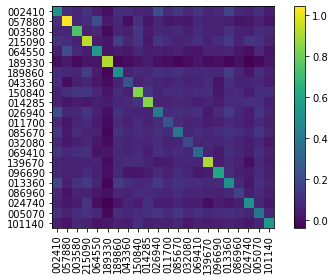

In [ ]:
# 수익률의 공분산 시각화
from pypfopt import plotting
plotting.plot_covariance(S)

# 포트폴리오 최적화 ( Max.샤프비율 )

In [ ]:
# Create the Efficient Frontier Object
# 효율적 투자선 구하기
ef = EfficientFrontier(mu, S)

# Maximize the Sharpe ratio, and get the raw weights
# max_sharpe()-> optimizes for maximal Sharpe ratio (a.k.a the tangency portfolio)
# 결과값 : CML(자본시장선)과 효율적 투자선(efficient frontier)의 접점에 있는 포트폴리오
weights = ef.max_sharpe()

# clean_weights()-> rounds the weights and clips near-zeros.
# weights < 0.0001 => clean_weights = 0
# cleaned_weights => 소숫점 5자리까지 표시
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef.portfolio_performance(verbose=True)

OrderedDict([('002410', 0.17764), ('057880', 0.0), ('003580', 0.0), ('215090', 0.0), ('064550', 0.13187), ('189330', 0.09182), ('189860', 0.01595), ('043360', 0.0), ('150840', 0.0), ('014285', 0.1018), ('026940', 0.00607), ('011700', 0.0), ('085670', 0.0), ('032080', 0.0), ('069410', 0.0), ('139670', 0.29845), ('096690', 0.0), ('013360', 0.0217), ('086960', 0.0), ('024740', 0.15469), ('005070', 0.0), ('101140', 0.0)])
Expected annual return: 84.2%
Annual volatility: 41.6%
Sharpe Ratio: 1.98


(0.8419022591086033, 0.4155378458006562, 1.9779239542549154)

**샤프비율을 최대화**  

**1. 포트폴리오의 기대 수익률**  

**2. 포트폴리오의 위험(Risk)**  

**3. Sharpe Ratio ( 샤프비율 )**  
한 단위의 위험을 부담하는 대신 얻을 수 있는 수익률  
샤프비율 = (수익률 - 무위험수익률) / 수익률의 표준편차(리스크)

In [ ]:
weights

OrderedDict([('002410', 0.177636822580673),
             ('057880', 0.0),
             ('003580', 0.0),
             ('215090', 0.0),
             ('064550', 0.1318711091248446),
             ('189330', 0.0918184770465415),
             ('189860', 0.0159547560238877),
             ('043360', 0.0),
             ('150840', 0.0),
             ('014285', 0.1018028855397056),
             ('026940', 0.0060740641268439),
             ('011700', 0.0),
             ('085670', 0.0),
             ('032080', 0.0),
             ('069410', 0.0),
             ('139670', 0.2984472161167684),
             ('096690', 0.0),
             ('013360', 0.021703019468946),
             ('086960', 0.0),
             ('024740', 0.1546916499717895),
             ('005070', 0.0),
             ('101140', 0.0)])

In [ ]:
len(weights)

22

In [ ]:
cleaned_weights

OrderedDict([('002410', 0.17764),
             ('057880', 0.0),
             ('003580', 0.0),
             ('215090', 0.0),
             ('064550', 0.13187),
             ('189330', 0.09182),
             ('189860', 0.01595),
             ('043360', 0.0),
             ('150840', 0.0),
             ('014285', 0.1018),
             ('026940', 0.00607),
             ('011700', 0.0),
             ('085670', 0.0),
             ('032080', 0.0),
             ('069410', 0.0),
             ('139670', 0.29845),
             ('096690', 0.0),
             ('013360', 0.0217),
             ('086960', 0.0),
             ('024740', 0.15469),
             ('005070', 0.0),
             ('101140', 0.0)])

In [ ]:
len(cleaned_weights)

22

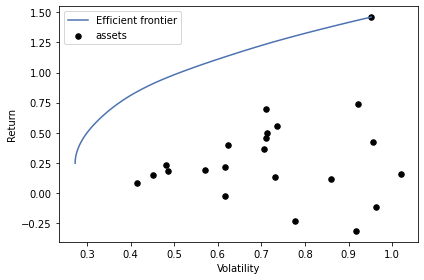

In [ ]:
# 효율적 투자선와 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

**효율적 투자선(efficient frontier)**  
- 투자기회집합 전체에서 지배원리를 만족시키는 포트폴리오의 집합
- 동일한 기대수익률 -> 낮은 위험(표준편차)
- 동일한 위험(표준편차) -> 높은 기대수익률
- 합리적 투자자는 효율적 투자선 위의 한 포트폴리오를 선택

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


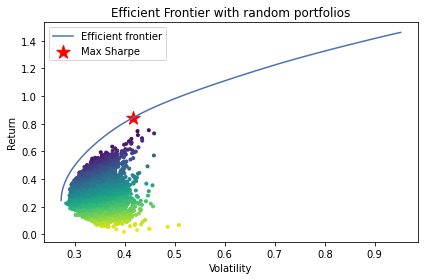

In [ ]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Minimize.volatility
# ef.min_volatility()
# ret_minv, std_minv, _ = ef.portfolio_performance()
# ax.scatter(std_minv, ret_minv, marker="*", s=100, c="b", label="Min Volatility")

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 20000
w = np.random.dirichlet(np.ones(len(mu)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets = w.dot(mu)                                     # 기대수익률
stds = np.sqrt(np.diag(w @ S @ w.T))                 # Risk(변동성)
sharpes = rets / stds                                # 샤프비율

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

**Maximize.Sharpe Ratio 로 포트폴리오 최적화**<br><br>
**Sharpe Ratio ( 샤프비율 )**  
한 단위의 위험을 부담하는 대신 얻을 수 있는 수익률  
샤프비율 = (수익률 - 무위험수익률) / 수익률의 표준편차(리스크)

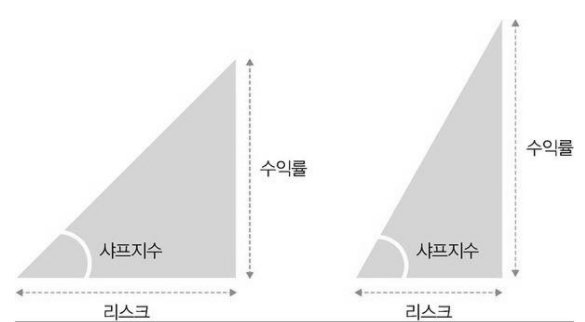

In [ ]:
# Max.Sharpe Ratio로 최적화한 포트폴리오의 수익률과 변동성, 샤프비율
ef.portfolio_performance(verbose=True)

Expected annual return: 84.2%
Annual volatility: 41.6%
Sharpe Ratio: 1.98


(0.8419022591086033, 0.4155378458006562, 1.9779239542549154)

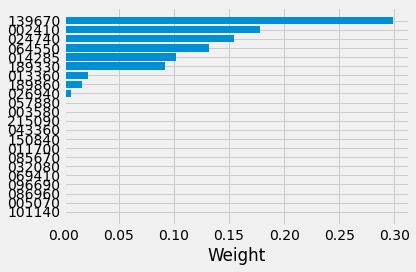

In [ ]:
# 종목별 투자비중
plotting.plot_weights(weights, ax=None)

In [ ]:
!pip install pulp

### 투자금액에과 포트폴리오의 비중에 맞추어 수량 할당

In [ ]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices = get_latest_prices(df2)

weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)

allocation, leftover = da.lp_portfolio(verbose=False)


# print("{}: allocated {:.3f}, desired {:.3f}".format(ticker, allocation_weight, weight)
# print("Allocation has RMSE: {:.3f}".format(rmse))

print('Discrete Allocaion: ', allocation)
print('Funds Remaining: ', leftover, ' KRW')
# print('Allocation has RMSE: {:.3f}'.format(rmse))

# 평균 제곱근 오차(Root Mean Square Error; RMSE)
# 포트폴리오의 종목별 비중과 실제 할당된 비중 간의 차이

rmse = da._allocation_rmse_error(verbose=False)
# print('Allocation has RMSE: {:.5f}'.format(rmse))

In [ ]:
allocation

{'002410': 326,
 '013360': 81,
 '014285': 40,
 '024740': 456,
 '026940': 13,
 '064550': 56,
 '139670': 168,
 '189330': 16,
 '189860': 21}

In [ ]:
len(allocation)

9

In [ ]:
latest_prices

002410     8190
057880     2895
003580    19800
215090     2075
064550    35750
189330    85800
189860    11300
043360     5800
150840     4010
014285    37900
026940     6850
011700     4240
085670     3300
032080     2930
069410    14550
139670    26600
096690     1570
013360     3985
086960    25150
024740     5090
005070    42950
101140     4525
Name: 2021-07-19 00:00:00, dtype: int64

In [ ]:
# 각 종목별 매수 주가 (inv_latest_price)
latest_prices.loc['002410']

8190

In [ ]:
allocation['002410']

326

In [ ]:
# 각 종목별 실제 투자 금액 (invest_price_for_stock)
latest_prices.loc['002410']*allocation['002410']

2669940

### 포트폴리오 결과로 보여줄 변수 저장

In [ ]:
# 각 종목별 실제 투자 금액
inv_total_price = {}

for i in allocation.keys():
  inv_total_price[i] = latest_prices.loc[i]*allocation[i]
inv_total_price

{'002410': 2669940,
 '013360': 322785,
 '014285': 1516000,
 '024740': 2321040,
 '026940': 89050,
 '064550': 2002000,
 '139670': 4468800,
 '189330': 1372800,
 '189860': 237300}

In [ ]:
inv_total_price['002410']

2669940

In [ ]:
# 총 투자금액
investment = 0

for i in inv_total_price.values():
    investment += i
print(investment)

14999715


In [ ]:
portfolio_val-leftover

14999715.0

In [ ]:
# 각 종목별 실제 투자 비중
inv_total_weight = {}

for i in allocation.keys():
  inv_total_weight[i] = inv_total_price[i]/investment
inv_total_weight

{'002410': 0.17799938198825777,
 '013360': 0.021519408868768505,
 '014285': 0.10106858696981909,
 '024740': 0.15473894003986075,
 '026940': 0.00593677946547651,
 '064550': 0.1334692025815157,
 '139670': 0.29792566058755116,
 '189330': 0.09152173891303934,
 '189860': 0.015820300585711128}

In [ ]:
# 투자비중의 합계
investment_w = 0

for i in inv_total_weight.values():
    investment_w += i
print(investment_w)

0.9999999999999999


In [ ]:
# 결과값으로 불러올 값을 리스트로 저장
name_list = []                    # 종목명(회사이름)
total_price_stock =[]             # 각 종목별 실제 투자 금액
total_weight_stock = []           # 각 종목별 실제 투자 비중

for i in allocation.keys(): # i = 포트폴리오에 할당된 종목의 종목코드
    name_list.append(code_name_dict.get(i))
    total_price_stock.append(inv_total_price.get(i))
    total_weight_stock.append(inv_total_weight.get(i))

In [ ]:
name_list

['범양건영', '바이오니아', '씨이랩', '서전기전', '금강공업우', '부국철강', '키네마스터', '일성건설', '한일단조']

In [ ]:
total_price_stock

[2669940, 2002000, 1372800, 237300, 1516000, 89050, 4468800, 322785, 2321040]

In [ ]:
total_weight_stock

[0.17799938198825777,
 0.1334692025815157,
 0.09152173891303934,
 0.015820300585711128,
 0.10106858696981909,
 0.00593677946547651,
 0.29792566058755116,
 0.021519408868768505,
 0.15473894003986075]

In [ ]:
# Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [ ]:
discrete_allocation_list

[326, 56, 16, 21, 40, 13, 168, 81, 456]

In [ ]:
# Create a dataframe for the portfolio
portfolio_df = pd.DataFrame(columns = ['종목명','종목코드','수량(주)', '투자금액(원)','투자비중'])
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중


In [ ]:
# portfolio_df['Company_name'] = company_name
portfolio_df['종목명'] = name_list
portfolio_df['종목코드'] = allocation
portfolio_df['수량(주)'] = discrete_allocation_list
portfolio_df['투자금액(원)'] = total_price_stock
portfolio_df['투자비중'] = total_weight_stock

In [ ]:
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,범양건영,002410,326,2669940,0.177999
1,바이오니아,064550,56,2002000,0.133469
2,씨이랩,189330,16,1372800,0.091522
3,서전기전,189860,21,237300,0.015820
4,금강공업우,014285,40,1516000,0.101069
5,부국철강,026940,13,89050,0.005937
6,키네마스터,139670,168,4468800,0.297926
7,일성건설,013360,81,322785,0.021519
8,한일단조,024740,456,2321040,0.154739


In [ ]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted = portfolio_df.sort_values('투자비중', ascending = False)
portfolio_df_sorted = portfolio_df_sorted.reset_index(drop=True)
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,키네마스터,139670,168,4468800,0.297926
1,범양건영,002410,326,2669940,0.177999
2,한일단조,024740,456,2321040,0.154739
3,바이오니아,064550,56,2002000,0.133469
4,금강공업우,014285,40,1516000,0.101069
5,씨이랩,189330,16,1372800,0.091522
6,일성건설,013360,81,322785,0.021519
7,서전기전,189860,21,237300,0.015820
8,부국철강,026940,13,89050,0.005937


### 투자 금액에 따라 최적화된 포트폴리오의 종목별 수량

In [ ]:
portfolio_df_sorted.loc["합계",2:] = portfolio_df_sorted.sum()
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,키네마스터,139670,168.0,4468800.0,0.297926
1,범양건영,002410,326.0,2669940.0,0.177999
2,한일단조,024740,456.0,2321040.0,0.154739
3,바이오니아,064550,56.0,2002000.0,0.133469
4,금강공업우,014285,40.0,1516000.0,0.101069
5,씨이랩,189330,16.0,1372800.0,0.091522
6,일성건설,013360,81.0,322785.0,0.021519
7,서전기전,189860,21.0,237300.0,0.015820
8,부국철강,026940,13.0,89050.0,0.005937
합계,NaN,NaN,1177.0,14999715.0,1.000000


In [ ]:
print('----- 1 months momentum portfolio performance -----')
# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)

# Show RMSE
# print('Allocation has RMSE: {:.3f}'.format(rmse))

----- 1 months momentum portfolio performance -----
Funds Remaining:  285.0  KRW
Expected annual return: 84.2%
Annual volatility: 41.6%
Sharpe Ratio: 1.98


(0.8418919735503071, 0.4155351342619374, 1.9779121084673863)

# 포트폴리오의 수익률과 변동성을 벤치마크지수(KOSPI)와 비교

In [ ]:
df2

,002410,057880,003580,215090,064550,189330,189860,043360,150840,014285,026940,011700,085670,032080,069410,139670,096690,013360,086960,024740,005070,101140
Date,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,1735,1885,14400,3032,9850,30500,4575,3145,12300,7490,2560,2590,3600,1970,8725,1897,3435,1315,19750,1555,24431,3165
2018-07-20,1750,1945,12000,3052,9880,30200,4400,3520,12300,7380,2540,2520,3520,1900,8691,1889,3097,1275,19800,1550,23888,2805
2018-07-23,1620,1801,9310,2909,9080,30000,4080,3395,11550,6760,2440,2250,3380,1840,8523,1865,2914,1195,18900,1440,22440,2630
2018-07-24,1665,1810,9990,3110,9110,30300,4400,3340,11600,7170,2585,2300,3510,1865,8388,1858,2914,1290,19100,1460,23164,2720
2018-07-25,1650,1638,10500,3039,8990,30300,4250,3320,11500,7170,2570,2285,3470,1830,8219,1852,2914,1255,18750,1400,23164,2630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,9500,2560,16850,1740,33000,81800,11450,4360,3720,22850,7040,3060,3095,3025,16200,30200,1252,4110,22200,4580,32500,4675
2021-07-14,8900,2662,17400,1750,33300,85000,10800,5660,3385,29700,7050,3035,3250,3025,15300,28550,1252,4080,21400,5300,37450,4685
2021-07-15,8860,2602,17850,1710,30550,84700,11100,6480,3925,34500,7050,3945,3115,3000,15450,28300,1230,4110,23200,5400,37400,4910


In [ ]:
cleaned_weights

OrderedDict([('002410', 0.17764),
             ('057880', 0.0),
             ('003580', 0.0),
             ('215090', 0.0),
             ('064550', 0.13187),
             ('189330', 0.09182),
             ('189860', 0.01595),
             ('043360', 0.0),
             ('150840', 0.0),
             ('014285', 0.1018),
             ('026940', 0.00607),
             ('011700', 0.0),
             ('085670', 0.0),
             ('032080', 0.0),
             ('069410', 0.0),
             ('139670', 0.29845),
             ('096690', 0.0),
             ('013360', 0.0217),
             ('086960', 0.0),
             ('024740', 0.15469),
             ('005070', 0.0),
             ('101140', 0.0)])

In [ ]:
len(cleaned_weights)

22

In [ ]:
# # 1씩 더하기
# cleaned_weights_p1 = dict(zip(cleaned_weights.keys(),map(lambda x:x[1]+1,cleaned_weights.items())))
# cleaned_weights_p1

{'002410': 1.17764,
 '057880': 1.0,
 '003580': 1.0,
 '215090': 1.0,
 '064550': 1.13186,
 '189330': 1.09181,
 '189860': 1.01594,
 '043360': 1.0,
 '150840': 1.0,
 '014285': 1.1018,
 '026940': 1.00605,
 '011700': 1.0,
 '085670': 1.0,
 '032080': 1.0,
 '069410': 1.0,
 '139670': 1.29844,
 '096690': 1.0,
 '013360': 1.02169,
 '086960': 1.0,
 '024740': 1.15468,
 '005070': 1.0,
 '101140': 1.0}

In [ ]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights.items():
    df2[i] = df2[i]*weight

In [ ]:
df2

,002410,057880,003580,215090,064550,189330,189860,043360,150840,014285,026940,011700,085670,032080,069410,139670,096690,013360,086960,024740,005070,101140
Date,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,308.2054,0.0,0.0,0.0,1298.9195,2800.510,72.97125,0.0,0.0,762.482,15.53920,0.0,0.0,0.0,0.0,566.15965,0.0,28.5355,0.0,240.54295,0.0,0.0
2018-07-20,310.8700,0.0,0.0,0.0,1302.8756,2772.964,70.18000,0.0,0.0,751.284,15.41780,0.0,0.0,0.0,0.0,563.77205,0.0,27.6675,0.0,239.76950,0.0,0.0
2018-07-23,287.7768,0.0,0.0,0.0,1197.3796,2754.600,65.07600,0.0,0.0,688.168,14.81080,0.0,0.0,0.0,0.0,556.60925,0.0,25.9315,0.0,222.75360,0.0,0.0
2018-07-24,295.7706,0.0,0.0,0.0,1201.3357,2782.146,70.18000,0.0,0.0,729.906,15.69095,0.0,0.0,0.0,0.0,554.52010,0.0,27.9930,0.0,225.84740,0.0,0.0
2018-07-25,293.1060,0.0,0.0,0.0,1185.5113,2782.146,67.78750,0.0,0.0,729.906,15.59990,0.0,0.0,0.0,0.0,552.72940,0.0,27.2335,0.0,216.56600,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,1687.5800,0.0,0.0,0.0,4351.7100,7510.876,182.62750,0.0,0.0,2326.130,42.73280,0.0,0.0,0.0,0.0,9013.19000,0.0,89.1870,0.0,708.48020,0.0,0.0
2021-07-14,1580.9960,0.0,0.0,0.0,4391.2710,7804.700,172.26000,0.0,0.0,3023.460,42.79350,0.0,0.0,0.0,0.0,8520.74750,0.0,88.5360,0.0,819.85700,0.0,0.0
2021-07-15,1573.8904,0.0,0.0,0.0,4028.6285,7777.154,177.04500,0.0,0.0,3512.100,42.79350,0.0,0.0,0.0,0.0,8446.13500,0.0,89.1870,0.0,835.32600,0.0,0.0


In [ ]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df2['Port'] = df2.sum(axis = 1)
df2

,002410,057880,003580,215090,064550,189330,189860,043360,150840,014285,026940,011700,085670,032080,069410,139670,096690,013360,086960,024740,005070,101140,Port
Date,,,,,,,,,,,,,,,,,,,,,,,
2018-07-19,308.2054,0.0,0.0,0.0,1298.9195,2800.510,72.97125,0.0,0.0,762.482,15.53920,0.0,0.0,0.0,0.0,566.15965,0.0,28.5355,0.0,240.54295,0.0,0.0,6093.86545
2018-07-20,310.8700,0.0,0.0,0.0,1302.8756,2772.964,70.18000,0.0,0.0,751.284,15.41780,0.0,0.0,0.0,0.0,563.77205,0.0,27.6675,0.0,239.76950,0.0,0.0,6054.80045
2018-07-23,287.7768,0.0,0.0,0.0,1197.3796,2754.600,65.07600,0.0,0.0,688.168,14.81080,0.0,0.0,0.0,0.0,556.60925,0.0,25.9315,0.0,222.75360,0.0,0.0,5813.10555
2018-07-24,295.7706,0.0,0.0,0.0,1201.3357,2782.146,70.18000,0.0,0.0,729.906,15.69095,0.0,0.0,0.0,0.0,554.52010,0.0,27.9930,0.0,225.84740,0.0,0.0,5903.38975
2018-07-25,293.1060,0.0,0.0,0.0,1185.5113,2782.146,67.78750,0.0,0.0,729.906,15.59990,0.0,0.0,0.0,0.0,552.72940,0.0,27.2335,0.0,216.56600,0.0,0.0,5870.58560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,1687.5800,0.0,0.0,0.0,4351.7100,7510.876,182.62750,0.0,0.0,2326.130,42.73280,0.0,0.0,0.0,0.0,9013.19000,0.0,89.1870,0.0,708.48020,0.0,0.0,25912.51350
2021-07-14,1580.9960,0.0,0.0,0.0,4391.2710,7804.700,172.26000,0.0,0.0,3023.460,42.79350,0.0,0.0,0.0,0.0,8520.74750,0.0,88.5360,0.0,819.85700,0.0,0.0,26444.62100
2021-07-15,1573.8904,0.0,0.0,0.0,4028.6285,7777.154,177.04500,0.0,0.0,3512.100,42.79350,0.0,0.0,0.0,0.0,8446.13500,0.0,89.1870,0.0,835.32600,0.0,0.0,26482.25940


In [ ]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio = df2[['Port']].pct_change()
portfolio

,Port
Date,
2018-07-19,NaN
2018-07-20,-0.006411
2018-07-23,-0.039918
2018-07-24,0.015531
2018-07-25,-0.005557
...,...
2021-07-13,0.081701
2021-07-14,0.020535
2021-07-15,0.001423


In [ ]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [ ]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [ ]:
# 코스피와 포트폴리오 합치기
result = kospi_pct.join(portfolio)
result

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,-0.006411
2018-07-23,-0.008684,-0.039918
2018-07-24,0.004799,0.015531
2018-07-25,-0.003144,-0.005557
...,...,...
2021-07-13,0.007673,0.081701
2021-07-14,-0.002008,0.020535
2021-07-15,0.006558,0.001423


In [ ]:
# 1열을 0으로 
result.iloc[0] = 0
result

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.006411
2018-07-23,-0.008684,-0.039918
2018-07-24,0.004799,0.015531
2018-07-25,-0.003144,-0.005557
...,...,...
2021-07-13,0.007673,0.081701
2021-07-14,-0.002008,0.020535
2021-07-15,0.006558,0.001423


In [ ]:
# 열 이름 변경
result.columns = ['KOSPI', 'PORTFOLIO']
result

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,-0.006411
2018-07-23,-0.008684,-0.039918
2018-07-24,0.004799,0.015531
2018-07-25,-0.003144,-0.005557
...,...,...
2021-07-13,0.007673,0.081701
2021-07-14,-0.002008,0.020535
2021-07-15,0.006558,0.001423


In [ ]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth = (1+result).cumprod()
wealth

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,0.993589
2018-07-23,0.994313,0.953927
2018-07-24,0.999084,0.968743
2018-07-25,0.995943,0.963360
...,...,...
2021-07-13,1.433376,4.252229
2021-07-14,1.430497,4.339548
2021-07-15,1.439878,4.345724


## 시각화

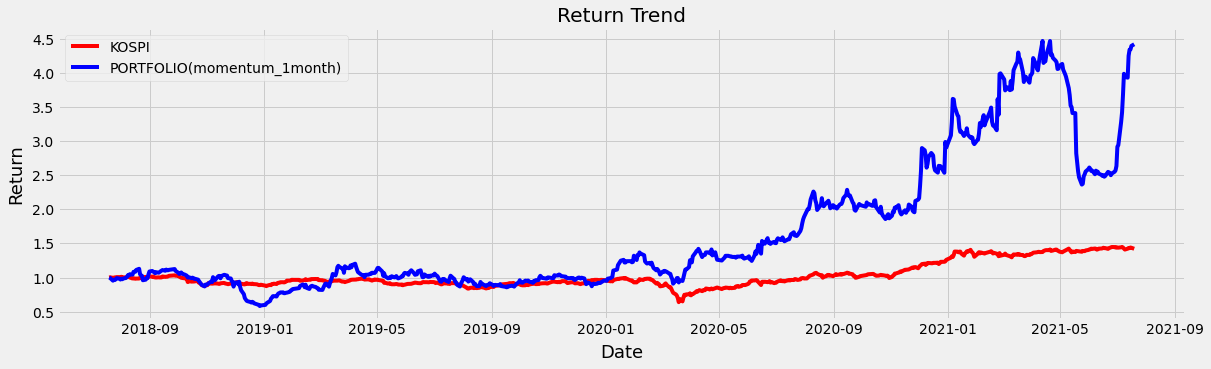

In [ ]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
# plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth.index, wealth.KOSPI , 'r', label='KOSPI')
plt.plot(wealth.index, wealth.PORTFOLIO ,'b', label="PORTFOLIO(momentum_1month)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

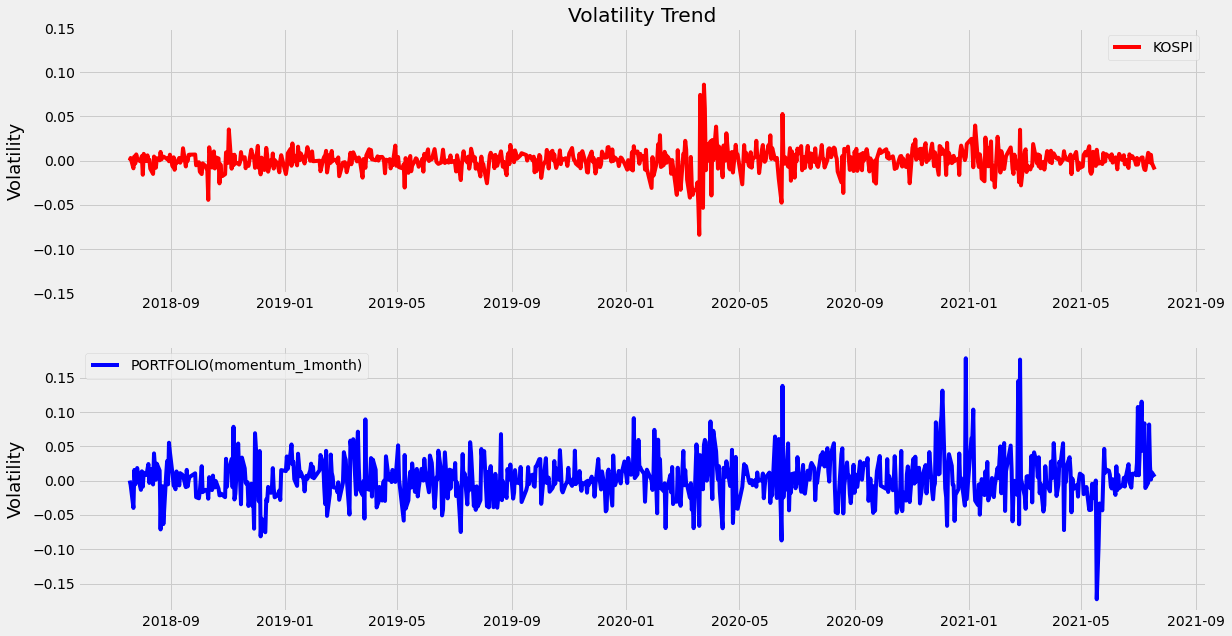

In [ ]:
# 변동률 비교
plt.figure(figsize=(18,10))


plt.subplot(2,1,1)
plt.title('Volatility Trend')
plt.plot(result.index, result.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(result.index, result.PORTFOLIO ,'b', label="PORTFOLIO(momentum_1month)")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [ ]:
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,키네마스터,139670,168.0,4468800.0,0.297926
1,범양건영,002410,326.0,2669940.0,0.177999
2,한일단조,024740,456.0,2321040.0,0.154739
3,바이오니아,064550,56.0,2002000.0,0.133469
4,금강공업우,014285,40.0,1516000.0,0.101069
5,씨이랩,189330,16.0,1372800.0,0.091522
6,일성건설,013360,81.0,322785.0,0.021519
7,서전기전,189860,21.0,237300.0,0.015820
8,부국철강,026940,13.0,89050.0,0.005937
합계,NaN,NaN,1177.0,14999715.0,1.000000


In [ ]:
print('----- 1 months momentum portfolio performance -----')
# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)

----- 1 months momentum portfolio performance -----
Funds Remaining:  285.0  KRW
Expected annual return: 84.2%
Annual volatility: 41.6%
Sharpe Ratio: 1.98


(0.8418919735503071, 0.4155351342619374, 1.9779121084673863)